

<img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/e/e4/National_University_of_Computer_and_Emerging_Sciences_logo.png"> 

<h1 align="center" style="color:Brown;"> BIG DATA ANALYTICS </h1> <h3 align="center" style="color:DarkRed;"> ASSIGNMENT 2 pySpark Clustering <h3><div align="right" style="color:Purple;">Name: <u>SAAD ATHER</u><br> Roll No. <u>21L-7289</u></div></h3></h3> 

---


In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession as ss
spark = ss.builder.appName('session').getOrCreate()
sc= spark.sparkContext

### Question 1: Explore and preprocess the “Leaves” data given


In [2]:
df = spark.read.csv('Leaves.csv',header=True,inferSchema=True)

In [3]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Month of absence: integer (nullable = true)
 |-- Day of the week: integer (nullable = true)
 |-- Distance from Residence to Work: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Body mass index: integer (nullable = true)
 |-- Absenteeism time in hours: integer (nullable = true)



In [4]:
df.show(10)

+---+----------------+---------------+-------------------------------+---+---------------+-------------------------+
| ID|Month of absence|Day of the week|Distance from Residence to Work|Age|Body mass index|Absenteeism time in hours|
+---+----------------+---------------+-------------------------------+---+---------------+-------------------------+
| 11|               7|              3|                             36| 33|             30|                        4|
| 36|               7|              3|                             13| 50|             31|                        0|
|  3|               7|              4|                             51| 38|             31|                        2|
|  7|               7|              5|                              5| 39|             24|                        4|
| 11|               7|              5|                             36| 33|             30|                        2|
|  3|               7|              6|                          

#### a) Handle missing values


In [5]:
df1 = df.dropna(how='any').dropDuplicates()

In [6]:
df1.count()

648

#### b) Identify if an attribute has outliers or noise

In [7]:
col1 = df.drop('ID').select('*').toPandas()

<AxesSubplot:>

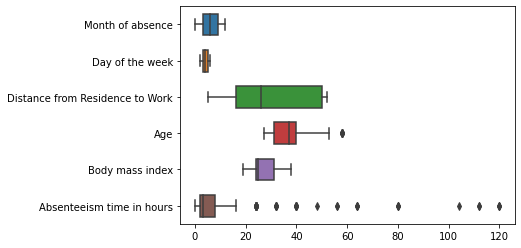

In [8]:
import seaborn as sns
sns.boxplot(data=col1,width=0.6, orient='h')

In [9]:
print(' \nOutliers found in "Absenteeism time" & "Age" \n\n')

print('{} Outliers in Absenteeism time in hours '.format(df.select('Absenteeism time in hours').where(
    df['Absenteeism time in hours'] > "20").count()))
print('{} Outliers in Age '.format(df.select('Age').where(
    df['Age'] > "57").count()),'\n\n')


 
Outliers found in "Absenteeism time" & "Age" 


44 Outliers in Absenteeism time in hours 
8 Outliers in Age  




#### c) Apply measures of the central tendency and dispersion to analyze numeric attributes. That is, compute the mean, median, mode, range, variance, correlation for the attribute. Don’t just give values explain analyze them.

In [10]:
from pyspark.sql.functions import *

In [11]:
print('Corelation between Age & Month of absence is                              {} '
      .format( df.corr('Age','Month of absence')))

print('Corelation between Day of the week & Distance from Residence to Work is    {} '
      .format( df.corr('Day of the week','Distance from Residence to Work')))



Corelation between Age & Month of absence is                              -0.001519544498427041 
Corelation between Day of the week & Distance from Residence to Work is    0.11802558057950518 


In [14]:
## coreation between each attribute in matrix form


from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

newdb = VectorAssembler(inputCols=['Age','Month of absence','Day of the week','Absenteeism time in hours',
          'Distance from Residence to Work'], outputCol="feat").transform(df)
df_for_corelmatrix = newdb.select('feat')

Correlmatrix = Correlation.corr(df_for_corelmatrix, 'feat').collect()[0]
for cor in Correlmatrix:
    print(cor)

DenseMatrix([[ 1.        , -0.00151954,  0.00445883,  0.0657597 , -0.14588637],
             [-0.00151954,  1.        , -0.00652801,  0.02434536, -0.00388726],
             [ 0.00445883, -0.00652801,  1.        , -0.12436061,  0.11802558],
             [ 0.0657597 ,  0.02434536, -0.12436061,  1.        , -0.08836282],
             [-0.14588637, -0.00388726,  0.11802558, -0.08836282,  1.        ]])


In [13]:
df.select('Age','Month of absence','Day of the week','Absenteeism time in hours',
          'Distance from Residence to Work').summary().show()

+-------+-----------------+------------------+------------------+-------------------------+-------------------------------+
|summary|              Age|  Month of absence|   Day of the week|Absenteeism time in hours|Distance from Residence to Work|
+-------+-----------------+------------------+------------------+-------------------------+-------------------------------+
|  count|              740|               740|               740|                      740|                            740|
|   mean|            36.45| 6.324324324324325|3.9148648648648647|        6.924324324324324|              29.63108108108108|
| stddev|6.478772457611868|3.4362869319125897|1.4216747097562805|       13.330998100978196|             14.836788436739143|
|    min|               27|                 0|                 2|                        0|                              5|
|    25%|               31|                 3|                 3|                        2|                             16|
|    50%

##### Results deduce:

By looking at the above data we analyzed that most of the employe lie in the age ranging between 27 to 58 and on average most of employee has an age of 35 years, similarly most of them prefeerd to take halfday/off on the 6th day of week that is on saturday. Employees took leaves for at max of 120 hours (5days OFF) and statistically speaking mean value is of 7hours that is a complete day Off if duty is 8hours per day. On average/mean people took Off/Halfday on 3rd day of week that is Wednesday. On average, employee residence distance from workplace is around 30Km and at max it is 52Km.
<br><br>

#### d) Would you apply preprocessing techniques like discretization or normalization on any attribute? Explain your answer. If yes, then apply the technique and share the results. <br>





Yes, i would apply preprocessing on 4 attributes which i will be considering the main features for my clustering. Since in clustering all the features should be in standerdize form so that the behaviour of the learning algorithum improves 

In [15]:
from pyspark.ml.feature import VectorAssembler

In [16]:
feat_col = ['Month of absence'  ,'Day of the week','Absenteeism time in hours','Distance from Residence to Work']

In [17]:
feat_vector = VectorAssembler(inputCols=feat_col, outputCol='features')

In [18]:
data = feat_vector.transform(df)

In [19]:
final_data = data.select('ID','features')

In [20]:
final_data

DataFrame[ID: int, features: vector]

In [21]:
final_data.show(4,truncate=False)
print('\n\n')

+---+------------------+
|ID |features          |
+---+------------------+
|11 |[7.0,3.0,4.0,36.0]|
|36 |[7.0,3.0,0.0,13.0]|
|3  |[7.0,4.0,2.0,51.0]|
|7  |[7.0,5.0,4.0,5.0] |
+---+------------------+
only showing top 4 rows






#### <b>NOTE:</b>
I used three types of scaling method one is using normalize and the other is StandardScaler lastly is MinMax scaling, to see the difference between these two scaling techniques

####  Normalizer Scaling technique

In [22]:
from pyspark.mllib.util import MLUtils
from pyspark.ml.feature import Normalizer


In [23]:
normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
normData = normalizer.transform(final_data)

In [24]:
normData.show(4,truncate=False)

+---+------------------+--------------------------------------------------------------------------------+
|ID |features          |normFeatures                                                                    |
+---+------------------+--------------------------------------------------------------------------------+
|11 |[7.0,3.0,4.0,36.0]|[0.14,0.06,0.08,0.72]                                                           |
|36 |[7.0,3.0,0.0,13.0]|[0.30434782608695654,0.13043478260869565,0.0,0.5652173913043478]                |
|3  |[7.0,4.0,2.0,51.0]|[0.109375,0.0625,0.03125,0.796875]                                              |
|7  |[7.0,5.0,4.0,5.0] |[0.3333333333333333,0.23809523809523808,0.19047619047619047,0.23809523809523808]|
+---+------------------+--------------------------------------------------------------------------------+
only showing top 4 rows



#### StanderScaler Scaling technique

In [25]:
from pyspark.ml.feature import StandardScaler

In [26]:
scaler = StandardScaler(inputCol='features',outputCol= 'scalefeatures',withMean=False,withStd=True)

In [27]:
scaled_data = scaler.fit(final_data).transform(final_data)

In [28]:
scaled_data.show(4,truncate=False)

+---+------------------+------------------------------------------------------------------------------+
|ID |features          |scalefeatures                                                                 |
+---+------------------+------------------------------------------------------------------------------+
|11 |[7.0,3.0,4.0,36.0]|[2.0370825075727588,2.110187358199749,0.30005255193206337,2.426401114600792]  |
|36 |[7.0,3.0,0.0,13.0]|[2.0370825075727588,2.110187358199749,0.0,0.8762004024947305]                 |
|3  |[7.0,4.0,2.0,51.0]|[2.0370825075727588,2.8135831442663317,0.15002627596603169,3.4374015790177888]|
|7  |[7.0,5.0,4.0,5.0] |[2.0370825075727588,3.5169789303329146,0.30005255193206337,0.3370001548056656]|
+---+------------------+------------------------------------------------------------------------------+
only showing top 4 rows



#### MinMaxScaler Scaling Technique

In [29]:
from pyspark.ml.feature import MinMaxScaler

In [30]:
scaler = MinMaxScaler(inputCol="features", outputCol="scaleFeatures_minmax",min=0,max=1)

In [31]:
# Compute summary statistics and generate MinMaxScalerModel
minmaxscaler = scaler.fit(final_data).transform(final_data)

In [32]:
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
minmaxscaler.select("features", "scaleFeatures_minmax").show(4,truncate=False)

Features scaled to range: [0.000000, 1.000000]
+------------------+----------------------------------------------------------------+
|features          |scaleFeatures_minmax                                            |
+------------------+----------------------------------------------------------------+
|[7.0,3.0,4.0,36.0]|[0.5833333333333333,0.25,0.03333333333333333,0.6595744680851063]|
|[7.0,3.0,0.0,13.0]|[0.5833333333333333,0.25,0.0,0.1702127659574468]                |
|[7.0,4.0,2.0,51.0]|[0.5833333333333333,0.5,0.016666666666666666,0.9787234042553191]|
|[7.0,5.0,4.0,5.0] |[0.5833333333333333,0.75,0.03333333333333333,0.0]               |
+------------------+----------------------------------------------------------------+
only showing top 4 rows



#### Differnce between the above techniques:
- So what basically Normalizer does is normalizing each Vector to have unit norm. <br>
- while StanderdScaler does is normalizing each feature to have unit standard deviation and zero mean.
- MinMaxScaler, rescales each feature to a specific range (often [0, 1]).
<br>
<br>
<br>

### Question 2: CLUSTER THE DATA using the PySpark built-in K-means and bisecting K-means clustering algorithm (this is provided in the Spark ML Library).
<br>

#### a) Cluster the given dataSet using atmost 3-4 attributes to avoid curse of dimensionality. You can select the attribute based on the preprocessing

In [33]:
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator


<b> For k=3:</b>

In [34]:
kmeans = KMeans(featuresCol='scalefeatures', k=3)

In [35]:
model = kmeans.fit(scaled_data)

In [36]:
pred = model.transform(scaled_data)

<b> Sum of square error for Analyzing results

In [37]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.82019148 2.20075334 0.4858147  2.01621552]
[1.66903819 3.79368242 0.35934602 2.38650624]
[1.067456   2.09821466 0.7380016  1.52754283]


<b> Silhouette co-efficient for Analyzing results

In [38]:
evaluator = ClusteringEvaluator()

In [39]:
silhouette = evaluator.evaluate(pred)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = -0.030729279203439153
Cluster Centers: 
[2.82019148 2.20075334 0.4858147  2.01621552]
[1.66903819 3.79368242 0.35934602 2.38650624]
[1.067456   2.09821466 0.7380016  1.52754283]


<b> For k=5:</b>

In [40]:
kmeans = KMeans(featuresCol='scalefeatures', k=5)

In [41]:
model = kmeans.fit(scaled_data)

In [42]:
pred = model.transform(scaled_data)

In [43]:
evaluator = ClusteringEvaluator()


In [44]:
silhouette = evaluator.evaluate(pred)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = -0.0009443478259490324
Cluster Centers: 
[2.58890674 2.1433664  0.39983418 3.13155804]
[2.63900432 1.8757221  1.37459973 1.29673051]
[2.42157995 3.75022935 0.30005255 1.72131996]
[0.97052431 2.3528589  0.34881109 1.29273259]
[0.94578831 3.19931632 0.43132554 3.25368214]


<b> For k=4:</b>

In [45]:
kmeans = KMeans(featuresCol='scaleFeatures_minmax', k=4)

In [46]:
model = kmeans.fit(minmaxscaler)

In [47]:
model.clusterCenters()

[array([0.51531863, 0.25      , 0.04987745, 0.93585732]),
 array([0.82660455, 0.29813665, 0.06811594, 0.34637241]),
 array([0.5171371 , 0.89516129, 0.04089382, 0.59565889]),
 array([0.30042735, 0.25769231, 0.07594017, 0.29252591])]

In [48]:
pred = model.transform(minmaxscaler).show()

+---+-------------------+--------------------+----------+
| ID|           features|scaleFeatures_minmax|prediction|
+---+-------------------+--------------------+----------+
| 11| [7.0,3.0,4.0,36.0]|[0.58333333333333...|         0|
| 36| [7.0,3.0,0.0,13.0]|[0.58333333333333...|         1|
|  3| [7.0,4.0,2.0,51.0]|[0.58333333333333...|         0|
|  7|  [7.0,5.0,4.0,5.0]|[0.58333333333333...|         2|
| 11| [7.0,5.0,2.0,36.0]|[0.58333333333333...|         2|
|  3| [7.0,6.0,2.0,51.0]|[0.58333333333333...|         2|
| 10| [7.0,6.0,8.0,52.0]|[0.58333333333333...|         2|
| 20| [7.0,6.0,4.0,50.0]|[0.58333333333333...|         2|
| 14|[7.0,2.0,40.0,12.0]|[0.58333333333333...|         3|
|  1| [7.0,2.0,8.0,11.0]|[0.58333333333333...|         3|
| 20| [7.0,2.0,8.0,50.0]|[0.58333333333333...|         0|
| 20| [7.0,3.0,8.0,50.0]|[0.58333333333333...|         0|
| 20| [7.0,4.0,8.0,50.0]|[0.58333333333333...|         0|
|  3| [7.0,4.0,1.0,51.0]|[0.58333333333333...|         0|
|  3| [7.0,4.0

<b> For k=4:</b>

In [49]:
kmeans = KMeans(featuresCol='scaleFeatures_minmax', k=4)

In [50]:
model = kmeans.fit(minmaxscaler)

In [51]:
model.clusterCenters()

[array([0.51531863, 0.25      , 0.04987745, 0.93585732]),
 array([0.82660455, 0.29813665, 0.06811594, 0.34637241]),
 array([0.5171371 , 0.89516129, 0.04089382, 0.59565889]),
 array([0.30042735, 0.25769231, 0.07594017, 0.29252591])]

In [52]:
pred = model.transform(minmaxscaler).show()

+---+-------------------+--------------------+----------+
| ID|           features|scaleFeatures_minmax|prediction|
+---+-------------------+--------------------+----------+
| 11| [7.0,3.0,4.0,36.0]|[0.58333333333333...|         0|
| 36| [7.0,3.0,0.0,13.0]|[0.58333333333333...|         1|
|  3| [7.0,4.0,2.0,51.0]|[0.58333333333333...|         0|
|  7|  [7.0,5.0,4.0,5.0]|[0.58333333333333...|         2|
| 11| [7.0,5.0,2.0,36.0]|[0.58333333333333...|         2|
|  3| [7.0,6.0,2.0,51.0]|[0.58333333333333...|         2|
| 10| [7.0,6.0,8.0,52.0]|[0.58333333333333...|         2|
| 20| [7.0,6.0,4.0,50.0]|[0.58333333333333...|         2|
| 14|[7.0,2.0,40.0,12.0]|[0.58333333333333...|         3|
|  1| [7.0,2.0,8.0,11.0]|[0.58333333333333...|         3|
| 20| [7.0,2.0,8.0,50.0]|[0.58333333333333...|         0|
| 20| [7.0,3.0,8.0,50.0]|[0.58333333333333...|         0|
| 20| [7.0,4.0,8.0,50.0]|[0.58333333333333...|         0|
|  3| [7.0,4.0,1.0,51.0]|[0.58333333333333...|         0|
|  3| [7.0,4.0

<b> For k=6:</b>

In [53]:
kmeans = KMeans(featuresCol='scalefeatures', k=6)

In [54]:
model = kmeans.fit(scaled_data)

In [55]:
model.clusterCenters()

[array([0.88842541, 2.8000563 , 0.39201577, 1.36323043]),
 array([2.04796145, 1.91297359, 0.46129575, 3.29315291]),
 array([2.74968829, 3.70184577, 0.31976754, 1.95114449]),
 array([2.16180184, 2.21067247, 6.55829149, 1.16024339]),
 array([1.06908541, 3.64284976, 0.3821722 , 3.29621625]),
 array([2.48269431, 1.85081016, 0.47164511, 1.30124185])]

In [56]:
pred = model.transform(scaled_data).show(10)

+---+-------------------+--------------------+----------+
| ID|           features|       scalefeatures|prediction|
+---+-------------------+--------------------+----------+
| 11| [7.0,3.0,4.0,36.0]|[2.03708250757275...|         1|
| 36| [7.0,3.0,0.0,13.0]|[2.03708250757275...|         5|
|  3| [7.0,4.0,2.0,51.0]|[2.03708250757275...|         1|
|  7|  [7.0,5.0,4.0,5.0]|[2.03708250757275...|         0|
| 11| [7.0,5.0,2.0,36.0]|[2.03708250757275...|         2|
|  3| [7.0,6.0,2.0,51.0]|[2.03708250757275...|         4|
| 10| [7.0,6.0,8.0,52.0]|[2.03708250757275...|         4|
| 20| [7.0,6.0,4.0,50.0]|[2.03708250757275...|         4|
| 14|[7.0,2.0,40.0,12.0]|[2.03708250757275...|         5|
|  1| [7.0,2.0,8.0,11.0]|[2.03708250757275...|         5|
+---+-------------------+--------------------+----------+
only showing top 10 rows



#### Using Bisecting Kmeans

#### For K = 6

In [57]:
bisectkmean = BisectingKMeans(featuresCol='scaleFeatures_minmax',k=6)

In [58]:
model = bisectkmean.fit(minmaxscaler)

In [59]:
pred = model.transform(minmaxscaler)

In [60]:
silhouette = evaluator.evaluate(pred)
print("\nSilhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("\nCluster Centers: ")
for center in centers:
    print(center,'\n')
    
pred.show(20)


Silhouette with squared euclidean distance = -0.15912229091375651

Cluster Centers: 
[0.32777778 0.26515152 0.07540404 0.25892972] 

[0.23469388 0.07653061 0.06938776 0.7485888 ] 

[0.70512821 0.10384615 0.0524359  0.901473  ] 

[0.82512626 0.24431818 0.07335859 0.33687943] 

[0.27921456 0.81034483 0.04434866 0.58987528] 

[0.7811828  0.81774194 0.03903226 0.66259437] 

+---+-------------------+--------------------+----------+
| ID|           features|scaleFeatures_minmax|prediction|
+---+-------------------+--------------------+----------+
| 11| [7.0,3.0,4.0,36.0]|[0.58333333333333...|         2|
| 36| [7.0,3.0,0.0,13.0]|[0.58333333333333...|         0|
|  3| [7.0,4.0,2.0,51.0]|[0.58333333333333...|         5|
|  7|  [7.0,5.0,4.0,5.0]|[0.58333333333333...|         4|
| 11| [7.0,5.0,2.0,36.0]|[0.58333333333333...|         5|
|  3| [7.0,6.0,2.0,51.0]|[0.58333333333333...|         5|
| 10| [7.0,6.0,8.0,52.0]|[0.58333333333333...|         5|
| 20| [7.0,6.0,4.0,50.0]|[0.58333333333333...|